This notebook contains the initial experiments and development process for the neural network.
It's meant to document the early work and rough drafts before refactoring the code into reusable modules.
For the clean version of the model, see the nn_numpy/ directory and scripts in the main project.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

Training Data

In [77]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [78]:
def plot_example(X, y):
    """Plot the first 5 images and their labels in a row."""
    for i, (img, y) in enumerate(zip(X[:5].reshape(5, 28, 28), y[:5])):
        plt.subplot(151 + i)
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
        plt.title(y)

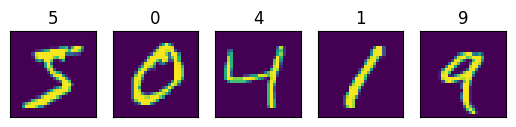

In [79]:
plot_example(x_train, y_train)

In [80]:
x_train.shape

(60000, 28, 28)

In [81]:
X_train = x_train.reshape(60000, -1).T / 255.0

In [82]:
train_accuracies = []
test_accuracies = []

Actual Data structure for the NN

In [95]:
class Neural_Network(object):
  def __init__(self):
      # hyperparameters
      self.inputLayerSize = 784
      self.outputLayerSize = 10
      self.hiddenLayerSize = 256

      # Weights
      self.W1 = np.random.randn(self.hiddenLayerSize, self.inputLayerSize) * 0.01
      self.W2 = np.random.randn(self.outputLayerSize, self.hiddenLayerSize) * 0.01

      self.B1 = np.zeros((self.hiddenLayerSize, 1))
      self.B2 = np.zeros((self.outputLayerSize, 1))

      # learning rate
      self.alpha = .1

  def forward(self, X):
    Z1 = np.dot(self.W1, X) + self.B1
    A1 = self.reLU(Z1)

    Z2 = np.dot(self.W2, A1) + self.B2
    A2 = self.softmax(Z2)

    return Z1, A1, Z2, A2

  def backward(self, X, Y, Z1, A1, Z2, A2):
    m = X.shape[1]

    # dA2 = A2 - Y
    # dZ2 = dA2 * self.reLuDerivative(Z2)
    dZ2 = A2 - Y

    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    dB2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.dot(self.W2.T, dZ2)
    dZ1 = dA1 * self.reLuDerivative(Z1)


    dW1 = (1 / m) * np.dot(dZ1, X.T)
    dB1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)

    self.W2 -= self.alpha * dW2
    self.B2 -= self.alpha * dB2
    self.W1 -= self.alpha * dW1
    self.B1 -= self.alpha * dB1


  def gradient_descent(self, X_train, Y_train, X_test, Y_test, epochs=10):

    for i in range(epochs):

      Z1, A1, Z2, A2 = self.forward(X_train)
      self.backward(X_train, Y_train, Z1, A1, Z2, A2)


      if i % 10 == 0:
            train_acc = self.accuracy(A2, Y_train)

            _, _, _, A2_test = self.forward(X_test)
            test_acc = self.accuracy(A2_test, Y_test)

            train_accuracies.append(train_acc)
            test_accuracies.append(test_acc)

            loss = self.cross_entropy_loss(Y_train, A2)
            print(f"Epoch {i}, Loss: {loss:.4f}, Train Acc: {train_acc * 100:.2f}%, Test Acc: {test_acc * 100:.2f}%")


  def reLU(self, Z):
    return np.maximum(0, Z)

  def reLuDerivative(self, Z):
    return Z > 0

  def softmax(self, Z):
    expZ = np.exp(Z - np.max(Z, axis=0, keepdims=True))
    return expZ / np.sum(expZ, axis=0, keepdims=True)

  def softmaxDerivative(self, Z):
    return self.softmax(Z) * (1 - self.softmax(Z))

  def cross_entropy_loss(self, Y, A2):
      m = Y.shape[1]
      # Clip A2 to avoid log(0)
      A2 = np.clip(A2, 1e-12, 1.0)
      loss = -np.sum(Y * np.log(A2)) / m
      return loss

  def accuracy(self, A2, Y):
    predictions = np.argmax(A2, axis=0)
    labels = np.argmax(Y, axis=0)
    return np.mean(predictions == labels)

In [96]:
NN = Neural_Network()

In [97]:
Y_train = np.zeros((10, y_train.size))
Y_train[y_train, np.arange(y_train.size)] = 1

In [98]:
X_test = x_test.reshape(10000, -1).T / 255.0

Y_test = np.zeros((10, y_test.size))
Y_test[y_test, np.arange(y_test.size)] = 1

In [104]:
NN.gradient_descent(X_train, Y_train, X_test, Y_test, epochs=1000)

Epoch 0, Loss: 1.7591, Train Acc: 70.55%, Test Acc: 71.51%
Epoch 10, Loss: 1.4831, Train Acc: 72.73%, Test Acc: 73.95%
Epoch 20, Loss: 1.2339, Train Acc: 75.46%, Test Acc: 76.53%
Epoch 30, Loss: 1.0451, Train Acc: 78.10%, Test Acc: 79.25%
Epoch 40, Loss: 0.9089, Train Acc: 80.14%, Test Acc: 81.02%
Epoch 50, Loss: 0.8099, Train Acc: 81.66%, Test Acc: 82.30%
Epoch 60, Loss: 0.7361, Train Acc: 82.84%, Test Acc: 83.51%
Epoch 70, Loss: 0.6794, Train Acc: 83.69%, Test Acc: 84.55%
Epoch 80, Loss: 0.6347, Train Acc: 84.52%, Test Acc: 85.36%
Epoch 90, Loss: 0.5985, Train Acc: 85.13%, Test Acc: 85.94%
Epoch 100, Loss: 0.5686, Train Acc: 85.69%, Test Acc: 86.50%
Epoch 110, Loss: 0.5435, Train Acc: 86.20%, Test Acc: 86.78%
Epoch 120, Loss: 0.5221, Train Acc: 86.62%, Test Acc: 87.03%
Epoch 130, Loss: 0.5036, Train Acc: 86.99%, Test Acc: 87.58%
Epoch 140, Loss: 0.4875, Train Acc: 87.32%, Test Acc: 87.97%
Epoch 150, Loss: 0.4733, Train Acc: 87.58%, Test Acc: 88.33%
Epoch 160, Loss: 0.4608, Train Acc:

In [105]:
_, _, _, A2_test = NN.forward(X_test)

In [106]:
test_acc = NN.accuracy(A2_test, Y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

Test Accuracy: 93.05%


Little script to plot some misclassified numbers

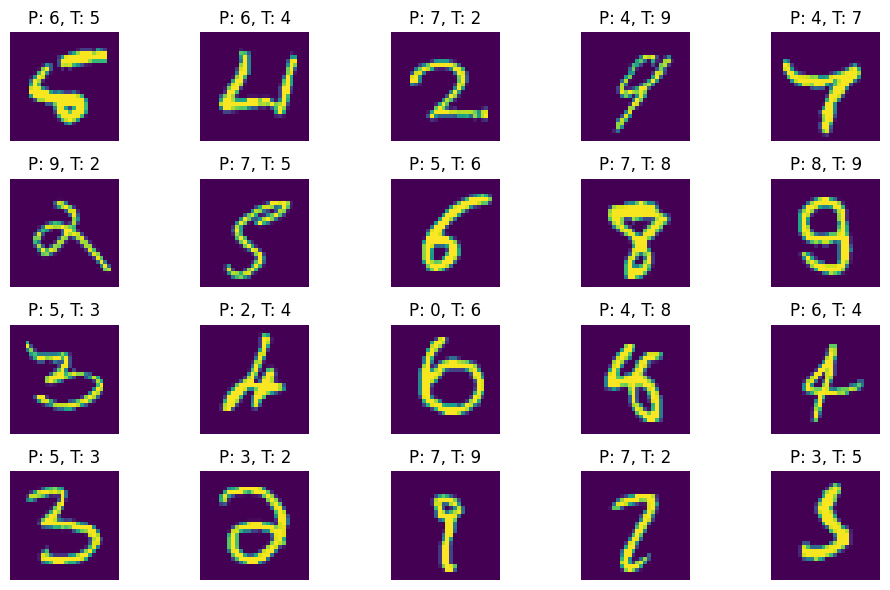

In [130]:
total = 20

misclassified = []

for i in range(A2_test.shape[1]):
  pred = np.argmax(A2_test[:, i])
  true = y_test[i]

  if pred != true:
    img = x_test[i].reshape(28, 28)
    misclassified.append((img, pred, true))

    if len(misclassified) == total:
      break

cols = 5
rows = total // cols + (total % cols > 0)
fig, axes = plt.subplots(rows, cols, figsize=(10, 6))

for idx, (img, pred, true) in enumerate(misclassified):
    ax = axes[idx // cols, idx % cols]
    ax.imshow(img)
    ax.set_title(f"P: {pred}, T: {true}")
    ax.axis('off')

# Hide any unused subplots
for j in range(len(misclassified), rows * cols):
    fig.delaxes(axes[j // cols, j % cols])

plt.tight_layout()
plt.show()

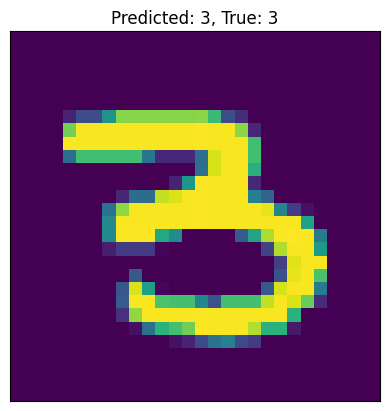

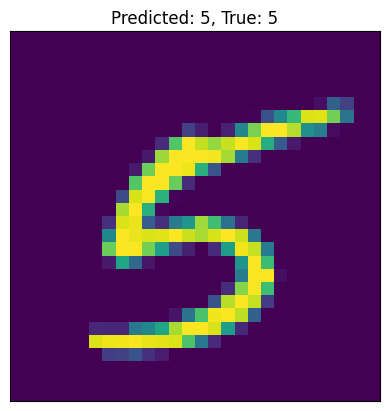

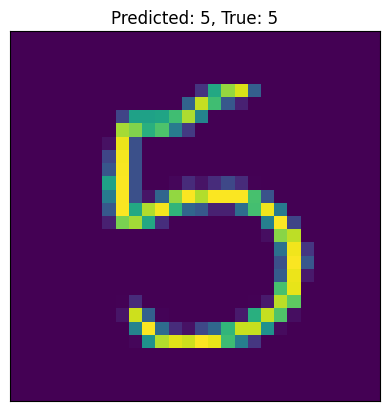

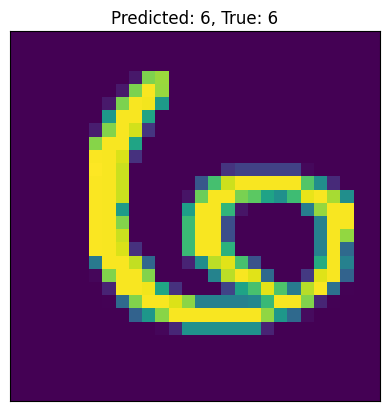

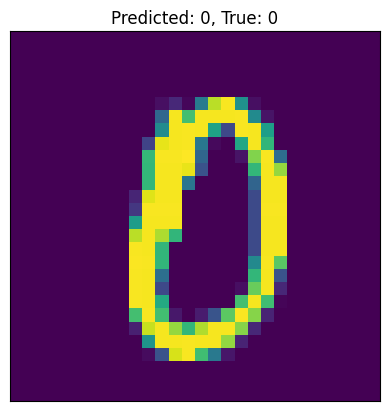

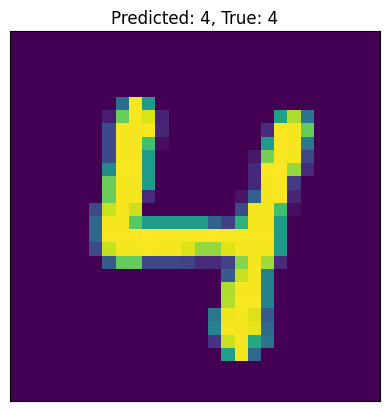

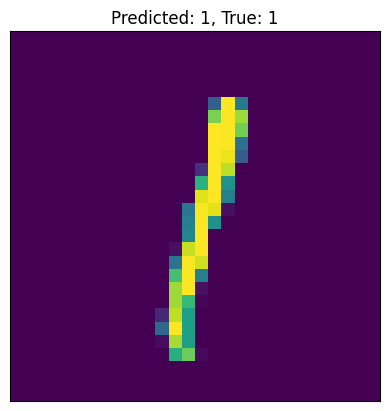

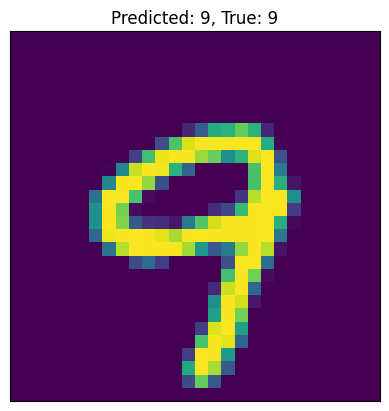

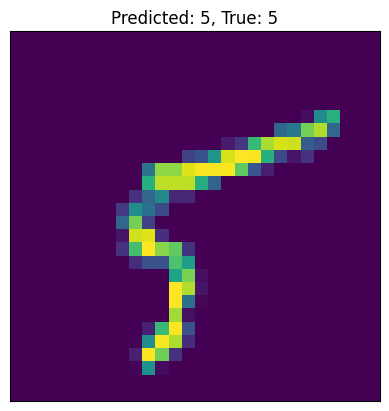

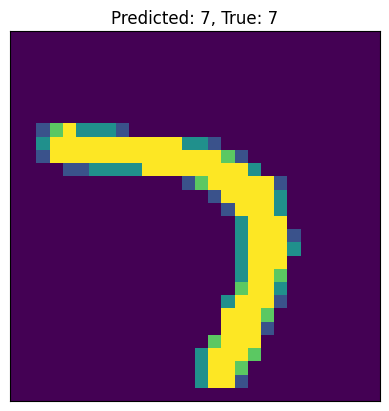

In [131]:
for i in range(10):

  index = 51
  img = x_test[index+i].reshape(28, 28)

  pred = np.argmax(A2_test[:, index+i])
  true = y_test[index+i]

  plt.imshow(img)
  plt.xticks([])
  plt.yticks([])
  plt.title(f"Predicted: {pred}, True: {true}")
  plt.show()


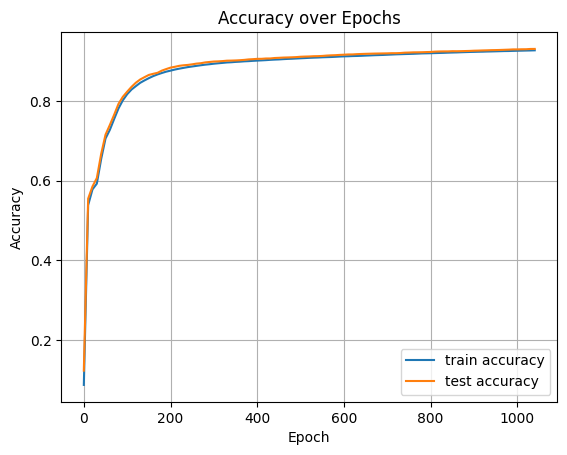

In [133]:
N = len(train_accuracies)
x = np.arange(N) * 10


plt.plot(x, train_accuracies, label="train accuracy")
plt.plot(x, test_accuracies, label="test accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy over Epochs")
plt.legend()
plt.grid(True)
plt.show()